In [1]:
import numpy as np
import pandas as pd
from scipy import signal, optimize
import matplotlib.pyplot as plt

In [2]:
def func(x, a, b):
    return a*np.exp(b*x)

In [3]:
N = 1001
n1 = N//3
n2 = 2*n1

In [4]:
t = np.linspace(0, 10, N)

In [5]:
x0 = func(t[:n1], 1, -0.2)
x1 = func(t[n1:n2]-t[n1], 5, -0.4)
x2 = func(t[n2:]-t[n2], 2, -1.2)

In [6]:
x = np.hstack([x0, x1, x2])
xr = x + 0.025*np.random.randn(x.size)

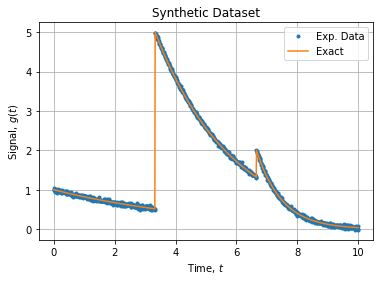

In [7]:
fig, axe = plt.subplots()
axe.plot(t, xr, '.', label='Exp. Data')
axe.plot(t, x, '-', label='Exact')
axe.set_title("Synthetic Dataset")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal, $g(t)$")
axe.legend()
axe.grid()

In [8]:
dxrdt = np.abs(np.diff(xr)/np.diff(t))

In [9]:
xcrit = 20

In [10]:
q = np.where(dxrdt > xcrit)
q

(array([332, 665], dtype=int64),)

In [17]:
idx

[0, 333, 666, 1001]

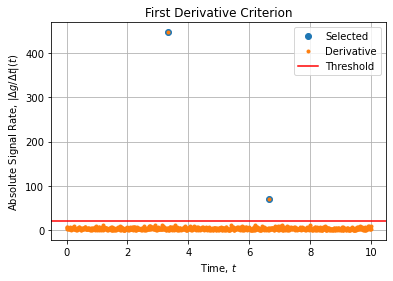

In [11]:
fig, axe = plt.subplots()
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

In [12]:
idx = [0] + list(q[0]+1) + [t.size]
idx

[0, 333, 666, 1001]

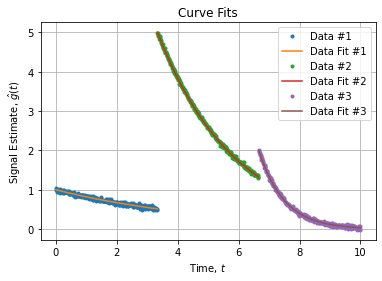

In [13]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], xr[i:j])
    axe.plot(t[i:j], xr[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [14]:
df = pd.DataFrame(trials)

In [15]:
df

,n0,n1,t0,a,b,s_a,s_b,s_ab
0,0,333,0.00,0.998032,-0.199102,0.000011,4.199937e-06,-0.000005
1,333,666,3.33,5.001710,-0.399537,0.000013,3.072542e-07,-0.000002
2,666,1001,6.66,2.002495,-1.203943,0.000030,2.256274e-05,-0.000018


In [16]:
print(df)

    n0    n1    t0         a         b       s_a           s_b      s_ab
0    0   333  0.00  0.998032 -0.199102  0.000011  4.199937e-06 -0.000005
1  333   666  3.33  5.001710 -0.399537  0.000013  3.072542e-07 -0.000002
2  666  1001  6.66  2.002495 -1.203943  0.000030  2.256274e-05 -0.000018
